# This kernel is to show common backgrounds in eCLIP

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from plot_params import *
import matplotlib.pyplot as plt
ground_truth_skipper_all = []

for f in Path('/projects/ps-yeolab3/eboyle/encode/pipeline/05_20220720/20220728_encode3/k562/output/enriched_windows').glob('*.enriched_windows.tsv.gz'):
    rbp = f.name.split('.')[1]
    df = pd.read_csv(f, sep = '\t')
    
    value = df.set_index('name')['enrichment_l2or']
    ground_truth_skipper_all.append(value)
    
    value.name = rbp
    
    
ground_truth_skipper_all = pd.concat(ground_truth_skipper_all, axis = 1).rename({'DDX3X': 'DDX3'}, axis = 1)

In [2]:
genomic_annotation = pd.read_csv('/projects/ps-yeolab4/software/skipper/1.0.0/bin/skipper/annotations/gencode.v38.annotation.k562_totalrna.gt1.tiled_partition.features.tsv.gz',
                                 sep = '\t')

Text(0, 0.5, 'density')

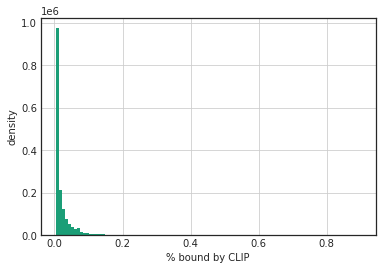

In [3]:

((~ground_truth_skipper_all.isnull()).mean(axis = 1)).hist(bins = 100)
plt.xlabel('% bound by CLIP')
plt.ylabel('density')

In [4]:
perc_bond = (~ground_truth_skipper_all.isnull()).mean(axis = 1)

In [5]:
genomic_annotation['% K562 CLIP replicate has binding site']=perc_bond

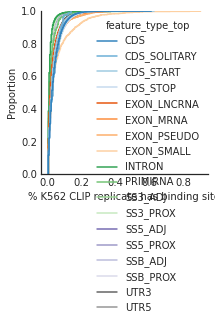

In [6]:

sns.set_palette('tab20c')
f, ax = plt.subplots(figsize = (3,3))
sns.ecdfplot(data = genomic_annotation.sort_values(by = 'feature_type_top'), 
             hue = 'feature_type_top', x = '% K562 CLIP replicate has binding site', 
             ax = ax)

sns.despine()

plt.savefig(figdir / 'ecdf_by_feature.pdf')

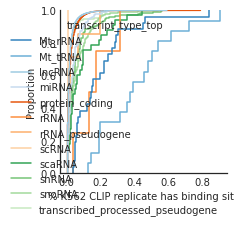

In [7]:
f, ax = plt.subplots(figsize = (3,3))
sns.ecdfplot(data = genomic_annotation.loc[genomic_annotation['transcript_type_top'].isin(
    ['lncRNA', 'protein_coding','snRNA',
       'miRNA', 'snoRNA', 'scaRNA','rRNA',
       'scRNA', 'transcribed_processed_pseudogene', 'rRNA_pseudogene',
      'Mt_rRNA', 'Mt_tRNA'])].sort_values(by = 'transcript_type_top'), 
             hue = 'transcript_type_top', x = '% K562 CLIP replicate has binding site', 
             ax = ax)

sns.despine()

plt.savefig(figdir / 'ecdf_by_transcript.pdf')


In [8]:
genomic_annotation.dropna().groupby(by = 'transcript_type_top')['% K562 CLIP replicate has binding site'].median().sort_values()

transcript_type_top
IG_V_gene                             0.004202
non_stop_decay                        0.004202
TR_C_gene                             0.006303
translated_unprocessed_pseudogene     0.008403
transcribed_processed_pseudogene      0.008403
scRNA                                 0.008403
ribozyme                              0.008403
nonsense_mediated_decay               0.008403
processed_transcript                  0.008403
TR_J_gene                             0.008403
TEC                                   0.008403
lncRNA                                0.008403
misc_RNA                              0.012605
unprocessed_pseudogene                0.012605
protein_coding                        0.012605
retained_intron                       0.012605
rRNA_pseudogene                       0.016807
IG_V_pseudogene                       0.016807
primary_miRNA                         0.016807
transcribed_unprocessed_pseudogene    0.016807
pseudogene                            0.

# Non-histone SLBP binding sites

In [9]:
def is_goldstandard(row):
    return ('UTR3' in row['feature_types'] or 'CDS_STOP' in row['feature_types']) and (
        row['gene_name'].startswith('H1') or row['gene_name'].startswith('H2') or
        row['gene_name'].startswith('H3') or row['gene_name'].startswith('H4'))
        

In [11]:
slbp = pd.read_csv(
    list(Path('/projects/ps-yeolab3/eboyle/encode/pipeline/05_20220720/20220728_encode3/k562/output/enriched_windows'
             ).glob('SLBP*.enriched_windows.tsv.gz'))[0],
    sep = '\t')

In [12]:
slbp['is_histone']=slbp.apply(is_goldstandard, axis = 1)

In [13]:
slbp['is_histone'].mean()

0.22786647314949202

In [14]:
genomic_annotation['feature_type_top'].value_counts()

INTRON          4508747
SS3_PROX         285041
SS5_PROX         284423
UTR3             192147
CDS              190897
SS5_ADJ           99696
SS3_ADJ           99431
SSB_PROX          67870
EXON_LNCRNA       63478
EXON_MRNA         49848
UTR5              37471
CDS_STOP          14466
SSB_ADJ           13104
CDS_START         12012
EXON_PSEUDO        4150
EXON_SMALL         2684
PRIMIRNA           1437
CDS_SOLITARY         95
Name: feature_type_top, dtype: int64

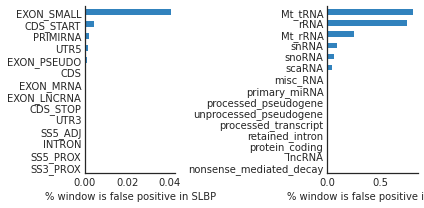

In [15]:
f, ax = plt.subplots(1,2, figsize = (6,3))
(slbp.loc[~slbp['is_histone'], 'feature_type_top'].value_counts()/genomic_annotation['feature_type_top'].value_counts()).sort_values().dropna().plot.barh(ax = ax[0])
(slbp.loc[~slbp['is_histone'], 'transcript_type_top'].value_counts()/genomic_annotation['transcript_type_top'].value_counts()).sort_values().dropna().plot.barh(ax = ax[1])
ax[0].set_xlabel('% window is false positive in SLBP')
ax[1].set_xlabel('% window is false positive in SLBP')
sns.despine()
plt.tight_layout()
plt.savefig(figdir / 'SLBP_eCLIP_FP.pdf')


In [17]:
high_noise = perc_bond[perc_bond.ge(0.6)]

<AxesSubplot: >

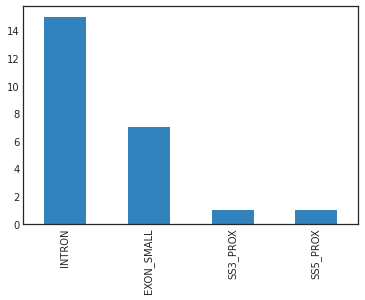

In [20]:
genomic_annotation.loc[genomic_annotation['name'].isin(high_noise.index), 
                      'feature_type_top'].value_counts().plot.bar()

<AxesSubplot: >

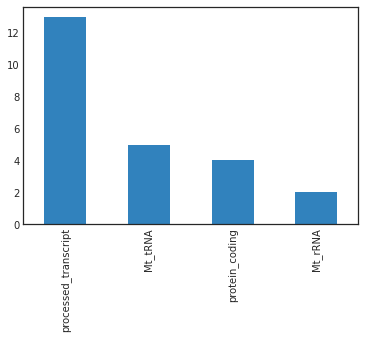

In [21]:
genomic_annotation.loc[genomic_annotation['name'].isin(high_noise.index), 
                      'transcript_type_top'].value_counts().plot.bar()